## Exploring Lasso Regression in Bernstein and Shore's paper

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("bike.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
349,2011-01-16 01:00:00,1,0,0,1,10.66,13.635,56,8.9981,4,19,23
350,2011-01-16 02:00:00,1,0,0,1,10.66,14.395,56,6.0032,3,13,16
351,2011-01-16 03:00:00,1,0,0,1,9.02,13.635,69,0.0000,9,6,15
352,2011-01-16 04:00:00,1,0,0,1,10.66,12.880,56,11.0014,0,1,1
353,2011-01-16 05:00:00,1,0,0,2,10.66,12.880,56,11.0014,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    354 non-null    object 
 1   season      354 non-null    int64  
 2   holiday     354 non-null    int64  
 3   workingday  354 non-null    int64  
 4   weather     354 non-null    int64  
 5   temp        354 non-null    float64
 6   atemp       354 non-null    float64
 7   humidity    354 non-null    int64  
 8   windspeed   354 non-null    float64
 9   casual      354 non-null    int64  
 10  registered  354 non-null    int64  
 11  count       354 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 33.3+ KB


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,354.0,354.0,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.0,0.0,0.646893,1.370056,8.475650,10.587020,54.878531,13.867732,4.451977,49.533898,53.985876
std,0.0,0.0,0.478612,0.579446,3.298819,4.060916,15.995553,8.484854,6.660033,45.956257,48.089887
min,1.0,0.0,0.000000,1.000000,3.280000,3.030000,28.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.0,0.000000,1.000000,6.560000,7.575000,43.250000,7.001500,0.000000,13.000000,15.000000
50%,1.0,0.0,1.000000,1.000000,8.200000,9.850000,51.000000,12.998000,2.000000,41.000000,45.000000
75%,1.0,0.0,1.000000,2.000000,9.840000,12.880000,64.000000,19.001200,6.000000,68.000000,76.000000
max,1.0,0.0,1.000000,3.000000,18.860000,22.725000,100.000000,39.000700,47.000000,216.000000,219.000000


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.nunique()

datetime      354
season          1
holiday         1
workingday      2
weather         3
temp           20
atemp          25
humidity       50
windspeed      20
casual         29
registered    124
count         133
dtype: int64

In [10]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,NaN,NaN,1.000000,-0.201669,-0.381034,-0.341350,-0.203217,-0.146195,-0.242179,0.271722,0.226127
weather,NaN,NaN,-0.201669,1.000000,0.317137,0.362336,0.460575,-0.151888,0.091605,-0.129354,-0.110928
temp,NaN,NaN,-0.381034,0.317137,1.000000,0.940629,0.212960,0.070332,0.587361,0.061497,0.140113
atemp,NaN,NaN,-0.341350,0.362336,0.940629,1.000000,0.351335,-0.246750,0.511998,0.023287,0.093161
humidity,NaN,NaN,-0.203217,0.460575,0.212960,0.351335,1.000000,-0.371919,-0.057108,-0.307208,-0.301487
windspeed,NaN,NaN,-0.146195,-0.151888,0.070332,-0.246750,-0.371919,1.000000,0.156449,0.057345,0.076468
casual,NaN,NaN,-0.242179,0.091605,0.587361,0.511998,-0.057108,0.156449,1.000000,0.255339,0.382502
registered,NaN,NaN,0.271722,-0.129354,0.061497,0.023287,-0.307208,0.057345,0.255339,1.000000,0.990995


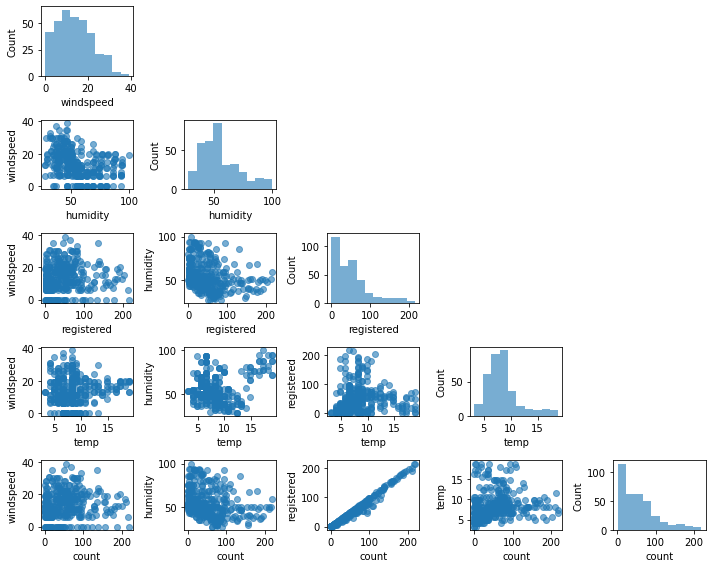

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ["windspeed", "humidity", "registered", "temp", "count" ]
scatterplotmatrix(df[cols].values, figsize=(10, 8), names = cols, alpha = 0.6)
plt.tight_layout()
plt.show()

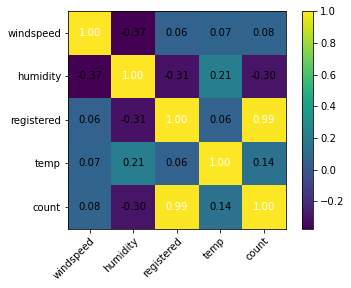

In [17]:
from mlxtend.plotting import heatmap 
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [34]:
X = df.iloc[4:9]
y = df.iloc[1:-1]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [5, 352]

In [31]:
X_train.shape

(265, 11)

In [21]:
y_train.shape

(265,)

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [23]:
lasso.fit(X_train, y_train)

ValueError: could not convert string to float: '2011-01-07 07:00:00'